In [2]:
# importing the libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from itertools import chain
import seaborn as sns
from datetime import datetime

# for reading and displaying images
# from skimage.io import imread
import matplotlib.pyplot as plt
import nibabel as nib
# from nilearn.image import resample_img
# from nilearn.image import new_img_like, load_img, clean_img, crop_img
# from nilearn.input_data import NiftiMasker
from scipy.stats import zscore
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split
# for evaluating the model
from sklearn.metrics import accuracy_score

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import *
import torch.optim as optim
import h5py
# from torchsummary import summary
from tensorboardX import SummaryWriter

from IPython import display
%matplotlib inline

In [3]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

In [4]:
model = 'inception'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Model {model.capitalize()} is selected.')


if model == 'resnet':
    from src.architectures.resnet import *

    opt = Option()

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    model = generate_model(model_depth=opt.model_depth,
                                n_classes=opt.n_classes,
                                n_input_channels=opt.n_input_channels,
                                shortcut_type=opt.shortcut_type,
                                conv1_t_size=opt.conv1_t_size,
                                conv1_t_stride=opt.conv1_t_stride,
                                no_max_pool=opt.no_max_pool,
                                widen_factor=opt.resnet_widen_factor)
    
elif model == 'levakov':
    from src.architectures.levakov_96 import *

    model = Levakov(task_type='age')
    
elif model == 'inception':
    from src.architectures.inception import *
    
    model = Inception3()
else: pass
model.to(device)

Model Inception is selected.


Inception3(
  (Conv3d_1a_3x3x3): BasicConv3d(
    (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), bias=False)
    (bn): BatchNorm3d(8, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_2a_3x3x3): BasicConv3d(
    (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_2b_3x3x3): BasicConv3d(
    (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool3d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv3d_3b_1x1x1): BasicConv3d(
    (conv): Conv3d(16, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv3d_4a_3x3x3): BasicConv3d(
    (conv): Conv3d

In [5]:
task_type = 'age'
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

In [6]:
# summary = SummaryWriter(f'./tensorboard/{datetime.now().strftime("%Y-%m-%d_%H%M")}')

In [7]:
from src.losses import RMSELoss

In [8]:
LOSS = {
    'RMSE': RMSELoss(),
    'MSE': nn.MSELoss(),
}

In [9]:
# loss_fn = nn.MSELoss()
loss = 'RMSE'

loss_fn = LOSS[loss]
optimizer = optim.Adam(model.parameters(), lr=1e-4)

FOLD 0
EPOCHS 0
RMSE :: [TRAIN] 42.813 | [VALID] 25.205
CORR :: [TRAIN] 0.116 | [VALID] 0.578


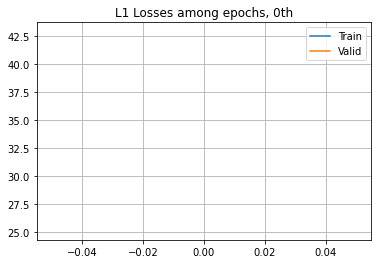

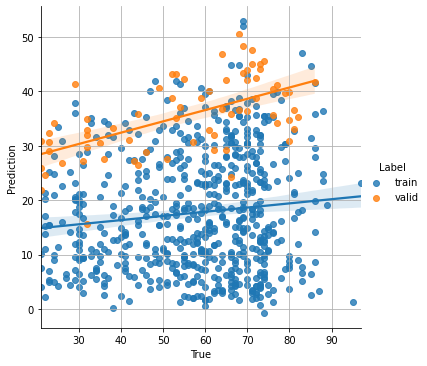

FOLD 0
EPOCHS 1
RMSE :: [TRAIN] 16.685 | [VALID] 13.759
CORR :: [TRAIN] 0.442 | [VALID] 0.733
FOLD 0
EPOCHS 2
RMSE :: [TRAIN] 13.352 | [VALID] 13.745
CORR :: [TRAIN] 0.586 | [VALID] 0.797
FOLD 0
EPOCHS 3
RMSE :: [TRAIN] 11.686 | [VALID] 12.812
CORR :: [TRAIN] 0.701 | [VALID] 0.802
FOLD 0
EPOCHS 4
RMSE :: [TRAIN] 11.150 | [VALID] 12.349
CORR :: [TRAIN] 0.731 | [VALID] 0.780
FOLD 0
EPOCHS 5
RMSE :: [TRAIN] 10.113 | [VALID] 13.584
CORR :: [TRAIN] 0.776 | [VALID] 0.791
FOLD 0
EPOCHS 6
RMSE :: [TRAIN] 9.841 | [VALID] 12.770
CORR :: [TRAIN] 0.802 | [VALID] 0.786
FOLD 0
EPOCHS 7
RMSE :: [TRAIN] 9.527 | [VALID] 11.522
CORR :: [TRAIN] 0.812 | [VALID] 0.813
FOLD 0
EPOCHS 8
RMSE :: [TRAIN] 8.473 | [VALID] 11.373
CORR :: [TRAIN] 0.853 | [VALID] 0.818
FOLD 0
EPOCHS 9
RMSE :: [TRAIN] 8.649 | [VALID] 13.017
CORR :: [TRAIN] 0.846 | [VALID] 0.785
FOLD 0
EPOCHS 10
RMSE :: [TRAIN] 8.468 | [VALID] 11.292
CORR :: [TRAIN] 0.855 | [VALID] 0.816


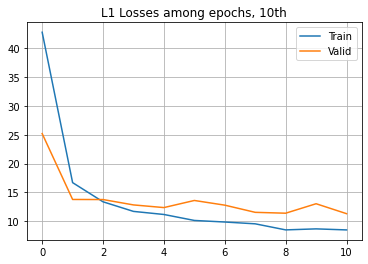

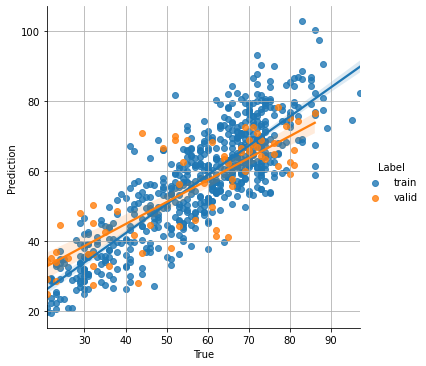

FOLD 0
EPOCHS 11
RMSE :: [TRAIN] 7.876 | [VALID] 10.932
CORR :: [TRAIN] 0.874 | [VALID] 0.838
FOLD 0
EPOCHS 12
RMSE :: [TRAIN] 7.856 | [VALID] 15.622
CORR :: [TRAIN] 0.876 | [VALID] 0.818
FOLD 0
EPOCHS 13
RMSE :: [TRAIN] 7.575 | [VALID] 10.679
CORR :: [TRAIN] 0.883 | [VALID] 0.839
FOLD 0
EPOCHS 14
RMSE :: [TRAIN] 7.799 | [VALID] 12.262
CORR :: [TRAIN] 0.882 | [VALID] 0.803
FOLD 0
EPOCHS 15
RMSE :: [TRAIN] 7.159 | [VALID] 14.120
CORR :: [TRAIN] 0.898 | [VALID] 0.792
FOLD 0
EPOCHS 16
RMSE :: [TRAIN] 7.379 | [VALID] 12.571
CORR :: [TRAIN] 0.893 | [VALID] 0.807
FOLD 0
EPOCHS 17
RMSE :: [TRAIN] 7.023 | [VALID] 10.447
CORR :: [TRAIN] 0.902 | [VALID] 0.843
FOLD 0
EPOCHS 18
RMSE :: [TRAIN] 6.572 | [VALID] 10.975
CORR :: [TRAIN] 0.914 | [VALID] 0.826
FOLD 0
EPOCHS 19
RMSE :: [TRAIN] 6.909 | [VALID] 11.601
CORR :: [TRAIN] 0.904 | [VALID] 0.829
FOLD 0
EPOCHS 20
RMSE :: [TRAIN] 6.499 | [VALID] 10.822
CORR :: [TRAIN] 0.914 | [VALID] 0.833


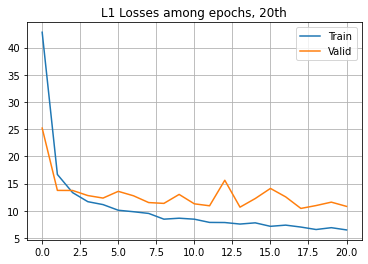

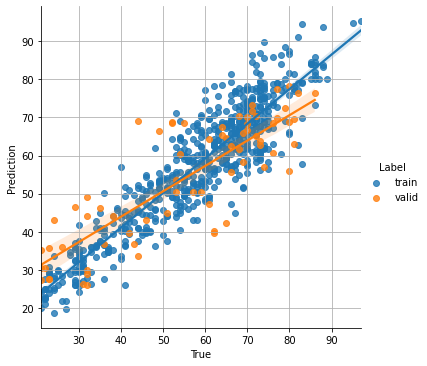

FOLD 0
EPOCHS 21
RMSE :: [TRAIN] 6.798 | [VALID] 10.865
CORR :: [TRAIN] 0.910 | [VALID] 0.835
FOLD 0
EPOCHS 22
RMSE :: [TRAIN] 7.166 | [VALID] 10.723
CORR :: [TRAIN] 0.897 | [VALID] 0.844
FOLD 0
EPOCHS 23
RMSE :: [TRAIN] 6.417 | [VALID] 10.277
CORR :: [TRAIN] 0.919 | [VALID] 0.859
FOLD 0
EPOCHS 24
RMSE :: [TRAIN] 6.908 | [VALID] 10.479
CORR :: [TRAIN] 0.905 | [VALID] 0.841
FOLD 0
EPOCHS 25
RMSE :: [TRAIN] 6.954 | [VALID] 10.797
CORR :: [TRAIN] 0.904 | [VALID] 0.848
FOLD 0
EPOCHS 26
RMSE :: [TRAIN] 6.346 | [VALID] 10.799
CORR :: [TRAIN] 0.919 | [VALID] 0.853
FOLD 0
EPOCHS 27
RMSE :: [TRAIN] 6.146 | [VALID] 10.391
CORR :: [TRAIN] 0.925 | [VALID] 0.844
FOLD 0
EPOCHS 28
RMSE :: [TRAIN] 6.497 | [VALID] 12.931
CORR :: [TRAIN] 0.915 | [VALID] 0.828
FOLD 0
EPOCHS 29
RMSE :: [TRAIN] 6.414 | [VALID] 10.217
CORR :: [TRAIN] 0.918 | [VALID] 0.852
FOLD 0
EPOCHS 30
RMSE :: [TRAIN] 5.710 | [VALID] 11.939
CORR :: [TRAIN] 0.935 | [VALID] 0.839


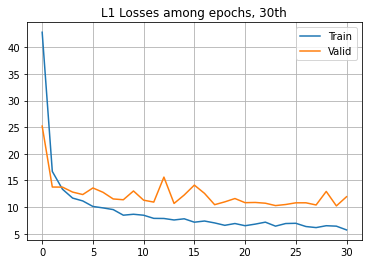

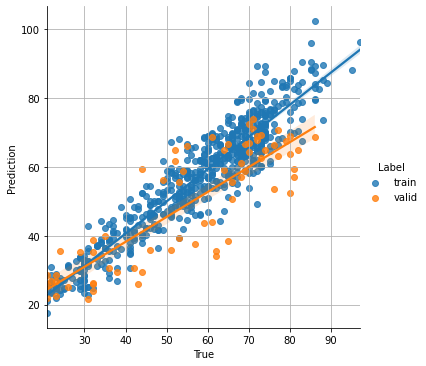

FOLD 0
EPOCHS 31
RMSE :: [TRAIN] 6.314 | [VALID] 10.527
CORR :: [TRAIN] 0.922 | [VALID] 0.849
FOLD 0
EPOCHS 32
RMSE :: [TRAIN] 6.248 | [VALID] 11.482
CORR :: [TRAIN] 0.923 | [VALID] 0.860
FOLD 0
EPOCHS 33
RMSE :: [TRAIN] 6.265 | [VALID] 14.402
CORR :: [TRAIN] 0.921 | [VALID] 0.844
FOLD 0
EPOCHS 34
RMSE :: [TRAIN] 6.539 | [VALID] 13.032
CORR :: [TRAIN] 0.917 | [VALID] 0.834
FOLD 0
EPOCHS 35
RMSE :: [TRAIN] 6.551 | [VALID] 10.904
CORR :: [TRAIN] 0.915 | [VALID] 0.849
FOLD 0
EPOCHS 36
RMSE :: [TRAIN] 6.322 | [VALID] 10.507
CORR :: [TRAIN] 0.921 | [VALID] 0.845
FOLD 0
EPOCHS 37
RMSE :: [TRAIN] 6.514 | [VALID] 10.988
CORR :: [TRAIN] 0.917 | [VALID] 0.840
FOLD 0
EPOCHS 38
RMSE :: [TRAIN] 6.173 | [VALID] 11.195
CORR :: [TRAIN] 0.923 | [VALID] 0.840
FOLD 0
EPOCHS 39
RMSE :: [TRAIN] 6.566 | [VALID] 11.372
CORR :: [TRAIN] 0.918 | [VALID] 0.817
FOLD 0
EPOCHS 40
RMSE :: [TRAIN] 5.803 | [VALID] 10.519
CORR :: [TRAIN] 0.933 | [VALID] 0.847


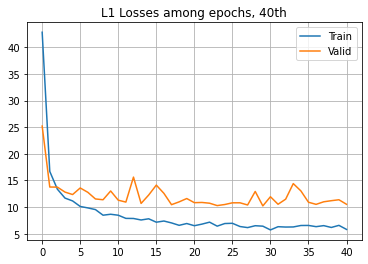

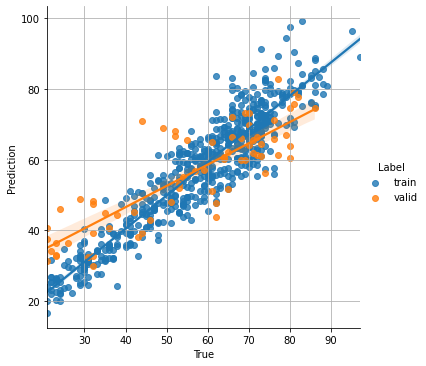

FOLD 0
EPOCHS 41
RMSE :: [TRAIN] 6.526 | [VALID] 12.994
CORR :: [TRAIN] 0.918 | [VALID] 0.777
FOLD 0
EPOCHS 42
RMSE :: [TRAIN] 6.173 | [VALID] 12.336
CORR :: [TRAIN] 0.924 | [VALID] 0.775
FOLD 0
EPOCHS 43
RMSE :: [TRAIN] 6.004 | [VALID] 11.170
CORR :: [TRAIN] 0.931 | [VALID] 0.823
FOLD 0
EPOCHS 44
RMSE :: [TRAIN] 6.134 | [VALID] 11.073
CORR :: [TRAIN] 0.925 | [VALID] 0.824
FOLD 0
EPOCHS 45
RMSE :: [TRAIN] 6.026 | [VALID] 10.564
CORR :: [TRAIN] 0.928 | [VALID] 0.843
FOLD 0
EPOCHS 46
RMSE :: [TRAIN] 5.572 | [VALID] 10.817
CORR :: [TRAIN] 0.939 | [VALID] 0.841
FOLD 0
EPOCHS 47
RMSE :: [TRAIN] 5.608 | [VALID] 12.033
CORR :: [TRAIN] 0.938 | [VALID] 0.844
FOLD 0
EPOCHS 48
RMSE :: [TRAIN] 5.618 | [VALID] 10.990
CORR :: [TRAIN] 0.937 | [VALID] 0.859
FOLD 0
EPOCHS 49
RMSE :: [TRAIN] 5.943 | [VALID] 9.591
CORR :: [TRAIN] 0.932 | [VALID] 0.871
FOLD 0
EPOCHS 50
RMSE :: [TRAIN] 5.709 | [VALID] 9.896
CORR :: [TRAIN] 0.936 | [VALID] 0.865


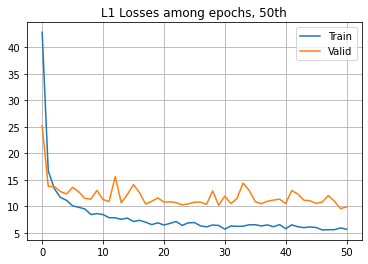

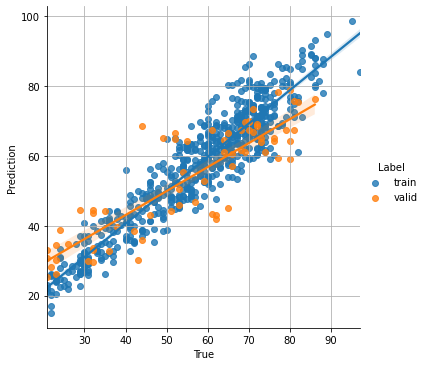

FOLD 0
EPOCHS 51
RMSE :: [TRAIN] 5.679 | [VALID] 9.622
CORR :: [TRAIN] 0.936 | [VALID] 0.870
FOLD 0
EPOCHS 52
RMSE :: [TRAIN] 5.486 | [VALID] 10.774
CORR :: [TRAIN] 0.940 | [VALID] 0.856
FOLD 0
EPOCHS 53
RMSE :: [TRAIN] 5.658 | [VALID] 9.985
CORR :: [TRAIN] 0.938 | [VALID] 0.870
FOLD 0
EPOCHS 54
RMSE :: [TRAIN] 5.136 | [VALID] 9.828
CORR :: [TRAIN] 0.948 | [VALID] 0.869
FOLD 0
EPOCHS 55
RMSE :: [TRAIN] 5.634 | [VALID] 10.460
CORR :: [TRAIN] 0.939 | [VALID] 0.855
FOLD 0
EPOCHS 56
RMSE :: [TRAIN] 5.584 | [VALID] 10.907
CORR :: [TRAIN] 0.938 | [VALID] 0.862
FOLD 0
EPOCHS 57
RMSE :: [TRAIN] 5.692 | [VALID] 10.497
CORR :: [TRAIN] 0.934 | [VALID] 0.855
FOLD 0
EPOCHS 58
RMSE :: [TRAIN] 5.714 | [VALID] 11.011
CORR :: [TRAIN] 0.935 | [VALID] 0.865
FOLD 0
EPOCHS 59
RMSE :: [TRAIN] 5.782 | [VALID] 11.764
CORR :: [TRAIN] 0.936 | [VALID] 0.854
FOLD 0
EPOCHS 60
RMSE :: [TRAIN] 5.708 | [VALID] 11.855
CORR :: [TRAIN] 0.936 | [VALID] 0.855


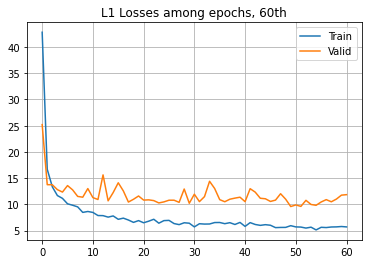

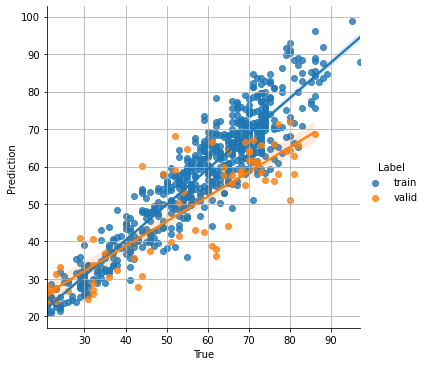

FOLD 0
EPOCHS 61
RMSE :: [TRAIN] 5.850 | [VALID] 11.763
CORR :: [TRAIN] 0.932 | [VALID] 0.826
FOLD 0
EPOCHS 62
RMSE :: [TRAIN] 5.748 | [VALID] 11.163
CORR :: [TRAIN] 0.935 | [VALID] 0.844
FOLD 0
EPOCHS 63
RMSE :: [TRAIN] 5.695 | [VALID] 11.968
CORR :: [TRAIN] 0.935 | [VALID] 0.850
FOLD 0
EPOCHS 64
RMSE :: [TRAIN] 5.615 | [VALID] 10.557
CORR :: [TRAIN] 0.938 | [VALID] 0.862
FOLD 0
EPOCHS 65
RMSE :: [TRAIN] 5.549 | [VALID] 10.643
CORR :: [TRAIN] 0.939 | [VALID] 0.862
FOLD 0
EPOCHS 66
RMSE :: [TRAIN] 5.344 | [VALID] 11.606
CORR :: [TRAIN] 0.943 | [VALID] 0.871
FOLD 0
EPOCHS 67
RMSE :: [TRAIN] 5.420 | [VALID] 11.961
CORR :: [TRAIN] 0.943 | [VALID] 0.858
FOLD 0
EPOCHS 68
RMSE :: [TRAIN] 5.407 | [VALID] 10.822
CORR :: [TRAIN] 0.943 | [VALID] 0.847
FOLD 0
EPOCHS 69
RMSE :: [TRAIN] 5.483 | [VALID] 10.705
CORR :: [TRAIN] 0.941 | [VALID] 0.865
FOLD 0
EPOCHS 70
RMSE :: [TRAIN] 5.322 | [VALID] 10.773
CORR :: [TRAIN] 0.944 | [VALID] 0.862


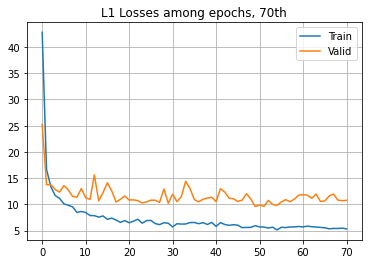

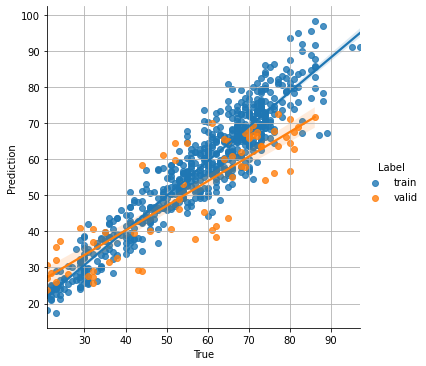

FOLD 0
EPOCHS 71
RMSE :: [TRAIN] 5.615 | [VALID] 10.755
CORR :: [TRAIN] 0.938 | [VALID] 0.861
FOLD 0
EPOCHS 72
RMSE :: [TRAIN] 5.567 | [VALID] 10.070
CORR :: [TRAIN] 0.939 | [VALID] 0.858
FOLD 0
EPOCHS 73
RMSE :: [TRAIN] 5.401 | [VALID] 10.231
CORR :: [TRAIN] 0.942 | [VALID] 0.862
FOLD 0
EPOCHS 74
RMSE :: [TRAIN] 5.508 | [VALID] 11.068
CORR :: [TRAIN] 0.941 | [VALID] 0.850
FOLD 0
EPOCHS 75
RMSE :: [TRAIN] 5.233 | [VALID] 13.784
CORR :: [TRAIN] 0.947 | [VALID] 0.847
FOLD 0
EPOCHS 76
RMSE :: [TRAIN] 5.393 | [VALID] 12.616
CORR :: [TRAIN] 0.943 | [VALID] 0.843
FOLD 0
EPOCHS 77
RMSE :: [TRAIN] 5.508 | [VALID] 12.368
CORR :: [TRAIN] 0.940 | [VALID] 0.854
FOLD 0
EPOCHS 78
RMSE :: [TRAIN] 5.451 | [VALID] 11.752
CORR :: [TRAIN] 0.942 | [VALID] 0.846
FOLD 0
EPOCHS 79
RMSE :: [TRAIN] 5.619 | [VALID] 11.812
CORR :: [TRAIN] 0.938 | [VALID] 0.858
FOLD 0
EPOCHS 80
RMSE :: [TRAIN] 5.198 | [VALID] 11.972
CORR :: [TRAIN] 0.947 | [VALID] 0.849


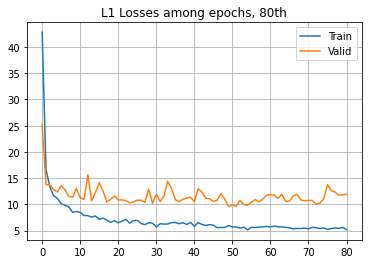

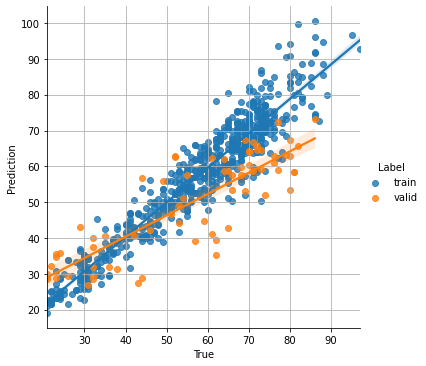

FOLD 0
EPOCHS 81
RMSE :: [TRAIN] 5.593 | [VALID] 11.712
CORR :: [TRAIN] 0.939 | [VALID] 0.854
FOLD 0
EPOCHS 82
RMSE :: [TRAIN] 5.844 | [VALID] 11.809
CORR :: [TRAIN] 0.934 | [VALID] 0.856
FOLD 0
EPOCHS 83
RMSE :: [TRAIN] 5.322 | [VALID] 11.245
CORR :: [TRAIN] 0.943 | [VALID] 0.862
FOLD 0
EPOCHS 84
RMSE :: [TRAIN] 5.164 | [VALID] 10.575
CORR :: [TRAIN] 0.947 | [VALID] 0.852
FOLD 0
EPOCHS 85
RMSE :: [TRAIN] 5.425 | [VALID] 10.982
CORR :: [TRAIN] 0.940 | [VALID] 0.870
FOLD 0
EPOCHS 86
RMSE :: [TRAIN] 5.169 | [VALID] 9.980
CORR :: [TRAIN] 0.948 | [VALID] 0.866
FOLD 0
EPOCHS 87
RMSE :: [TRAIN] 5.480 | [VALID] 11.387
CORR :: [TRAIN] 0.940 | [VALID] 0.867
FOLD 0
EPOCHS 88
RMSE :: [TRAIN] 5.348 | [VALID] 10.168
CORR :: [TRAIN] 0.944 | [VALID] 0.864
FOLD 0
EPOCHS 89
RMSE :: [TRAIN] 5.317 | [VALID] 9.979
CORR :: [TRAIN] 0.945 | [VALID] 0.871
FOLD 0
EPOCHS 90
RMSE :: [TRAIN] 5.426 | [VALID] 9.789
CORR :: [TRAIN] 0.942 | [VALID] 0.874


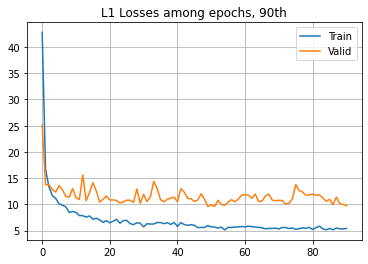

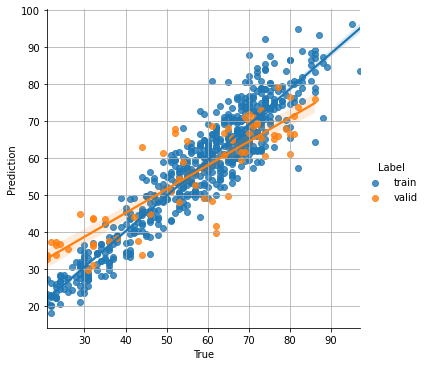

FOLD 0
EPOCHS 91
RMSE :: [TRAIN] 5.471 | [VALID] 10.211
CORR :: [TRAIN] 0.939 | [VALID] 0.870
FOLD 0
EPOCHS 92
RMSE :: [TRAIN] 5.264 | [VALID] 9.891
CORR :: [TRAIN] 0.945 | [VALID] 0.869
FOLD 0
EPOCHS 93
RMSE :: [TRAIN] 5.012 | [VALID] 10.834
CORR :: [TRAIN] 0.951 | [VALID] 0.861
FOLD 0
EPOCHS 94
RMSE :: [TRAIN] 5.120 | [VALID] 10.102
CORR :: [TRAIN] 0.949 | [VALID] 0.868
FOLD 0
EPOCHS 95
RMSE :: [TRAIN] 5.441 | [VALID] 10.176
CORR :: [TRAIN] 0.941 | [VALID] 0.860
FOLD 0
EPOCHS 96
RMSE :: [TRAIN] 5.194 | [VALID] 11.120
CORR :: [TRAIN] 0.947 | [VALID] 0.856
FOLD 0
EPOCHS 97
RMSE :: [TRAIN] 5.342 | [VALID] 10.650
CORR :: [TRAIN] 0.944 | [VALID] 0.867
FOLD 0
EPOCHS 98
RMSE :: [TRAIN] 5.499 | [VALID] 10.446
CORR :: [TRAIN] 0.940 | [VALID] 0.865
FOLD 0
EPOCHS 99
RMSE :: [TRAIN] 4.873 | [VALID] 10.720
CORR :: [TRAIN] 0.951 | [VALID] 0.863
FOLD 0
RMSE :: [TEST] 11.595
CORR :: [TEST] 0.713


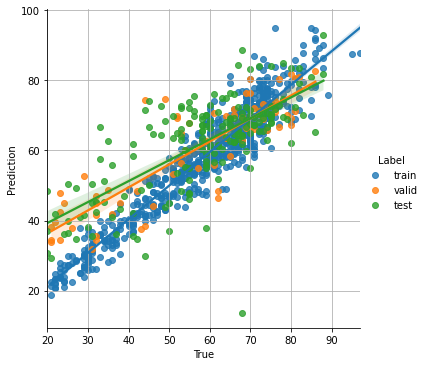

FOLD 1
EPOCHS 0
RMSE :: [TRAIN] 6.110 | [VALID] 4.096
CORR :: [TRAIN] 0.922 | [VALID] 0.984


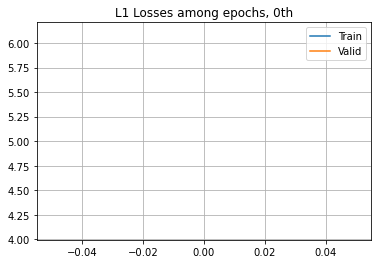

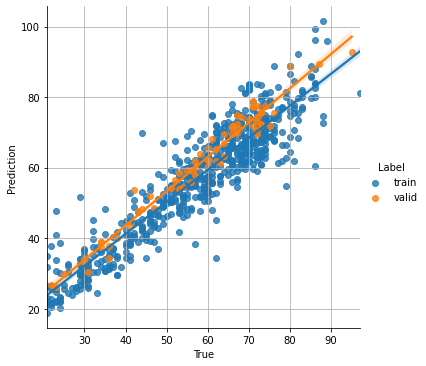

FOLD 1
EPOCHS 1
RMSE :: [TRAIN] 5.756 | [VALID] 4.189
CORR :: [TRAIN] 0.933 | [VALID] 0.977
FOLD 1
EPOCHS 2
RMSE :: [TRAIN] 5.592 | [VALID] 4.774
CORR :: [TRAIN] 0.937 | [VALID] 0.975
FOLD 1
EPOCHS 3
RMSE :: [TRAIN] 5.656 | [VALID] 5.501
CORR :: [TRAIN] 0.937 | [VALID] 0.973
FOLD 1
EPOCHS 4
RMSE :: [TRAIN] 5.344 | [VALID] 7.303
CORR :: [TRAIN] 0.946 | [VALID] 0.979
FOLD 1
EPOCHS 5
RMSE :: [TRAIN] 5.457 | [VALID] 3.837
CORR :: [TRAIN] 0.942 | [VALID] 0.978
FOLD 1
EPOCHS 6
RMSE :: [TRAIN] 5.221 | [VALID] 8.506
CORR :: [TRAIN] 0.948 | [VALID] 0.974
FOLD 1
EPOCHS 7
RMSE :: [TRAIN] 5.296 | [VALID] 3.718
CORR :: [TRAIN] 0.947 | [VALID] 0.977
FOLD 1
EPOCHS 8
RMSE :: [TRAIN] 5.216 | [VALID] 4.887
CORR :: [TRAIN] 0.949 | [VALID] 0.974
FOLD 1
EPOCHS 9
RMSE :: [TRAIN] 5.172 | [VALID] 4.789
CORR :: [TRAIN] 0.948 | [VALID] 0.973
FOLD 1
EPOCHS 10
RMSE :: [TRAIN] 4.805 | [VALID] 5.765
CORR :: [TRAIN] 0.955 | [VALID] 0.975


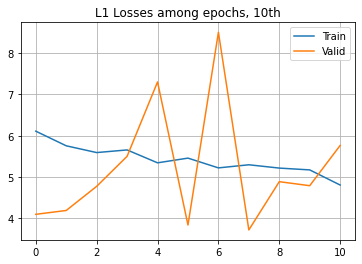

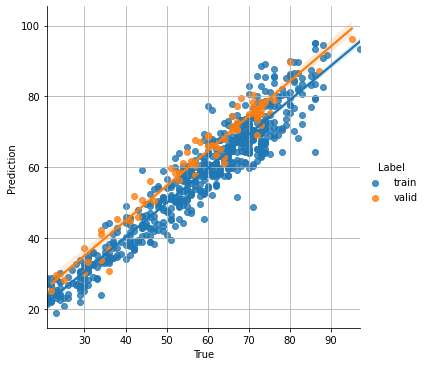

FOLD 1
EPOCHS 11
RMSE :: [TRAIN] 5.095 | [VALID] 4.157
CORR :: [TRAIN] 0.950 | [VALID] 0.973
FOLD 1
EPOCHS 12
RMSE :: [TRAIN] 5.057 | [VALID] 5.104
CORR :: [TRAIN] 0.952 | [VALID] 0.966
FOLD 1
EPOCHS 13
RMSE :: [TRAIN] 5.316 | [VALID] 5.458
CORR :: [TRAIN] 0.947 | [VALID] 0.974


In [ ]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []
for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    test_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    trn_losses, tst_losses = [], []
    for e in epochs:

        # TRAIN
        trn_bth_loss = 0
        trn_trues, trn_preds = [], []
        model.train()
        for i, (x, y) in enumerate(train_loader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trn_trues.append(y.to('cpu'))
            trn_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            loss.backward()
            optimizer.step()
            if scheduler: scheduler.step()

            trn_bth_loss += loss.item()

        torch.cuda.empty_cache()

        ### loss
        trn_losses.append(trn_bth_loss / len(train_loader))

        ### collect trues/predictions
        trn_trues = list(chain(*trn_trues))
        trn_preds = list(chain(*trn_preds))


        # TEST
        tst_bth_loss = 0
        model.eval()
        tst_trues, tst_preds = [], []
        with torch.no_grad(): # to not give loads on GPU... :(
            for i, (x, y) in enumerate(test_loader):
                if resize:
                    x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

                else:
                    x, y = x.to(device), y.to(device)

                y_pred = model.forward(x).to(device)

                tst_trues.append(y.to('cpu'))
                tst_preds.append(y_pred.to('cpu'))

                loss = loss_fn(y_pred.squeeze(1), y)
                del x, y, y_pred

                tst_bth_loss += loss.item()

        torch.cuda.empty_cache()
        ### loss
        tst_losses.append(tst_bth_loss / len(test_loader))

        ### collect trues/predictions
        tst_trues = list(chain(*tst_trues))
        tst_preds = list(chain(*tst_preds))

        reg_df = pd.DataFrame({
            'True': list(map(float, trn_trues + tst_trues)),
            'Prediction': list(map(float, trn_preds + tst_preds)),
            'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
        })

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        print(f'FOLD {fold}')
        print(f'EPOCHS {e}')
        print(f'RMSE :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
        print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

        if e % 10 == 0:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(tst_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold_losses.append(trn_losses)
    trn_fold_corrs.append(trn_corr)
    tst_fold_losses.append(tst_losses)
    tst_fold_corrs.append(tst_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    tst_bth_loss = 0
    model.eval()
    tst_trues, tst_preds = [], []
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(test_loader):
            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            y_pred = model.forward(x).to(device)

            tst_trues.append(y.to('cpu'))
            tst_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            tst_bth_loss += loss.item()

    torch.cuda.empty_cache()
    ### loss
    tst_loss = tst_bth_loss / len(test_loader)

    ### collect trues/predictions
    tst_trues = list(chain(*tst_trues))
    tst_preds = list(chain(*tst_preds))
    
    tst_df = pd.DataFrame({
        'True': list(map(float, tst_trues)),
        'Prediction': list(map(float, tst_preds)),
        'Label': ['test'] * len(tst_trues)
    })
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    print(f'FOLD {fold}')
    print(f'RMSE :: [TEST] {tst_loss:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()

In [ ]:
trn_fold_losses_np = np.array(trn_fold_losses)
tst_fold_losses_np = np.array(tst_fold_losses)

trn_loss_avg = np.average(trn_fold_losses_np, axis=0)
trn_loss_std = np.std(trn_fold_losses_np, axis=0)

tst_loss_avg = np.average(tst_fold_losses_np, axis=0)
tst_loss_std = np.std(tst_fold_losses_np, axis=0)

plt.figure(figsize=(7, 4))
plt.title('Train/Valid Loss Among Epochs 100, Fold 10')

plt.plot(trn_loss_avg, label='Train')
plt.fill_between(range(100), trn_loss_avg-trn_loss_std, trn_loss_avg+trn_loss_std, alpha=.2)
plt.plot(tst_loss_avg, label='Valid')
plt.fill_between(range(100), tst_loss_avg-trn_loss_std, tst_loss_avg+trn_loss_std, alpha=.2)

plt.xlabel('Epochs')
plt.ylabel('RMSE loss')

plt.legend()
plt.ylim(0, 5)
plt.grid()

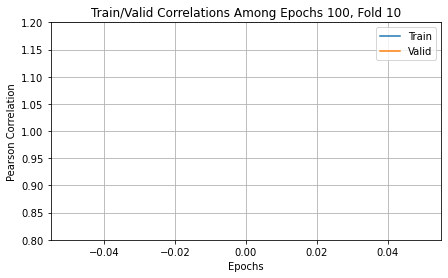

In [20]:
trn_fold_corrs_np = np.array(trn_fold_corrs)
tst_fold_corrs_np = np.array(tst_fold_corrs)

trn_corr_avg = np.average(trn_fold_corrs_np, axis=0)
trn_corr_std = np.std(trn_fold_corrs_np, axis=0)

tst_corr_avg = np.average(tst_fold_corrs_np, axis=0)
tst_corr_std = np.std(tst_fold_corrs_np, axis=0)

plt.figure(figsize=(7, 4))
plt.title('Train/Valid Correlations Among Epochs 100, Fold 10')

plt.plot(trn_corr_avg, label='Train')
# plt.fill_between(range(100), trn_corr_avg-trn_corr_std, trn_corr_avg+trn_corr_std, alpha=.2)
plt.plot(tst_corr_avg, label='Valid')
# plt.fill_between(range(100), tst_corr_avg-trn_corr_std, tst_corr_avg+trn_corr_std, alpha=.2)

plt.xlabel('Epochs')
plt.ylabel('Pearson Correlation')

plt.legend()
plt.ylim(0.8, 1.2)
plt.grid()

In [11]:
# trn_losses, tst_losses = [], []
# best_loss = 10

# for e in range(300):

#     # TRAIN
#     trn_bth_loss = 0
#     trn_trues, trn_preds = [], []
#     model.train()
#     for i, (x, y) in enumerate(train_loader):

#         if resize:
#             x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#         else:
#             x, y = x.to(device), y.to(device)

#         optimizer.zero_grad()

#         y_pred = model.forward(x).to(device)

#         trn_trues.append(y.to('cpu'))
#         trn_preds.append(y_pred.to('cpu'))

#         loss = torch.sqrt(loss_fn(y_pred.squeeze(1), y)) # <- for MSE -> RMSE
# #         loss = loss_fn(y_pred.squeeze(1), y)
#         del x, y, y_pred

#         loss.backward()
#         optimizer.step()
#         if scheduler: scheduler.step()

#         trn_bth_loss += loss.item()

#     torch.cuda.empty_cache()
    
#     ### loss
#     trn_losses.append(trn_bth_loss / len(train_loader))

#     ### collect trues/predictions
#     trn_trues = list(chain(*trn_trues))
#     trn_preds = list(chain(*trn_preds))

        
#     # TEST
#     tst_bth_loss = 0
#     model.eval()
#     tst_trues, tst_preds = [], []
#     with torch.no_grad(): # to not give loads on GPU... :(
#         for i, (x, y) in enumerate(test_loader):
#             if resize:
#                 x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#             else:
#                 x, y = x.to(device), y.to(device)

#             y_pred = model.forward(x).to(device)

#             tst_trues.append(y.to('cpu'))
#             tst_preds.append(y_pred.to('cpu'))

#             loss = torch.sqrt(loss_fn(y_pred.squeeze(1), y)) # <- for MSE -> RMSE
# #             loss = loss_fn(y_pred.squeeze(1), y)
#             del x, y, y_pred

#             tst_bth_loss += loss.item()

#     torch.cuda.empty_cache()
#     ### loss
#     tst_losses.append(tst_bth_loss / len(test_loader))

#     ### collect trues/predictions
#     tst_trues = list(chain(*tst_trues))
#     tst_preds = list(chain(*tst_preds))
    
#     reg_df = pd.DataFrame({
#         'True': list(map(float, trn_trues + tst_trues)),
#         'Prediction': list(map(float, trn_preds + tst_preds)),
#         'Label': ['train'] * len(trn_trues) + ['test'] * len(tst_trues)
#     })
    
#     trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
#     tst_corr = reg_df[reg_df['Label'] == 'test' ].corr().Prediction['True']

#     print(f'EPOCHS {e}')
#     print(f'RMSE :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
#     print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')
    
#     sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#     plt.grid()
#     plt.show()
    
#     if best_loss - .02 > tst_losses[-1]:
        
#         date = f'{datetime.now().strftime("%Y-%m-%d_%H%M")}'
#         fname = f"./models/{date}_{tst_losses[-1]:.3f}_model.pth"
#         torch.save(model, fname)
#         best_loss = min(tst_losses[-1], best_loss)
        
#     summary.add_scalars('loss/RMSE_loss',
#                          {'Train Loss': trn_losses[-1],
#                           'Valid Loss': tst_losses[-1]}, e)
#     summary.add_scalars('corr',
#                        {'Train Correlation': trn_corr,
#                         'Valid Correlation': tst_corr,
#                         'Total Correlation': reg_df.corr().Prediction['True']}, e)
    
#     if e % 20 == 0:
#         plt.plot(trn_losses, label='Train')
#         plt.plot(tst_losses, label='Valid')
#         plt.title(f"L1 Losses among epochs, {e}th")
#         #plt.ylim(0, 500)
#         plt.grid()
#         plt.legend()

In [12]:
# %load ../2d_slice/src/slice_viewer.py

In [13]:
# SliceViewer(np.array(train_dset[0][0][0])).triple_view()